# Traffic accidents in Mexico (1997-2023) - Data Analysis

**Author:** Juan C. Ruiz Navarro  
**Project:** Road Safety & Accident Analysis  
**Objective:** Explore, analyze, and visualize patterns in traffic accidents across Mexico over the last 25 years to generate actionable insights for safety policies and decision-making.

## Importing Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Dates & time
from datetime import datetime

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

## Load Data

In [2]:
import sqlite3
conn = sqlite3.connect("../data/DB/accidentes_trafico_mexico")

# Load tables
query = """
SELECT
	a.id,
	a.tipo_accidente,
	a.causa_accidente,
	m.nombre as municipio,
	e.nombre as estado,
	a.superficie_rodamiento,
	a.sexo,
	a.edad,
	a.aliento_alcoholico,
	a.cinturon,
	a.fecha_hora,
	a.zona,
	v.automovil,
	v.autobus,
	v.bicicleta,
	v.camioneta_carga,
	v.camioneta_pasajeros,
	v.camion_carga,
	v.camion_urbano,
	v.ferrocarril,
	v.microbus,
	v.motocicleta,
	v.otro_vehiculo,
	v.tractor,
	v.tranvia,
	h.ciclista_herido,
	h.conductor_herido,
	h.no_espec_herido,
	h.otro_herido,
	h.pasajero_herido,
	h.peaton_herido,
	mu.ciclista_muerto,
	mu.conductor_muerto,
	mu.no_espec_muerto,
	mu.otro_muerto,
	mu.pasajero_muerto,
	mu.peaton_muerto
FROM accidentes a
LEFT JOIN municipios m ON a.municipio_id = m.id
LEFT JOIN entidades e ON m.entidad_id = e.id
LEFT JOIN vehiculos v ON a.vehiculos_id = v.id
LEFT JOIN muertos mu ON a.muertos_id = mu.id
LEFT JOIN heridos h ON a.heridos_id = h.id
WHERE a.fecha_hora > "2021-12-31 23:59:59"
"""

df = pd.read_sql(query, conn)
conn.close()

df.head

<bound method NDFrame.head of               id                   tipo_accidente causa_accidente  \
0        9502051  Colisión con vehículo automotor       Conductor   
1        9502052  Colisión con vehículo automotor       Conductor   
2        9502053         Colisión con objeto fijo       Conductor   
3        9502054         Colisión con objeto fijo       Conductor   
4        9502055  Colisión con vehículo automotor       Conductor   
...          ...                              ...             ...   
789328  10291379                        Volcadura       Conductor   
789329  10291380         Colisión con motocicleta       Conductor   
789330  10291381  Colisión con vehículo automotor       Conductor   
789331  10291382  Colisión con vehículo automotor       Conductor   
789332  10291383  Colisión con vehículo automotor       Conductor   

             municipio          estado superficie_rodamiento    sexo  edad  \
0       Aguascalientes  Aguascalientes           Pavimentada  H

In [3]:
# Dataset dimensions
print("Rows: ",df.shape[0])
print("Columns: ", df.shape[1])

# General info
df.info()

#Statistical summary
df.describe()

# Check for missing values
df.isnull().sum()

Rows:  789333
Columns:  37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789333 entries, 0 to 789332
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     789333 non-null  int64 
 1   tipo_accidente         789333 non-null  object
 2   causa_accidente        789333 non-null  object
 3   municipio              789333 non-null  object
 4   estado                 789333 non-null  object
 5   superficie_rodamiento  789333 non-null  object
 6   sexo                   789333 non-null  object
 7   edad                   789333 non-null  int64 
 8   aliento_alcoholico     789333 non-null  object
 9   cinturon               789333 non-null  object
 10  fecha_hora             789333 non-null  object
 11  zona                   789333 non-null  object
 12  automovil              789333 non-null  int64 
 13  autobus                789333 non-null  int64 
 14  bicicleta              78

id                       0
tipo_accidente           0
causa_accidente          0
municipio                0
estado                   0
superficie_rodamiento    0
sexo                     0
edad                     0
aliento_alcoholico       0
cinturon                 0
fecha_hora               0
zona                     0
automovil                0
autobus                  0
bicicleta                0
camioneta_carga          0
camioneta_pasajeros      0
camion_carga             0
camion_urbano            0
ferrocarril              0
microbus                 0
motocicleta              0
otro_vehiculo            0
tractor                  0
tranvia                  0
ciclista_herido          0
conductor_herido         0
no_espec_herido          0
otro_herido              0
pasajero_herido          0
peaton_herido            0
ciclista_muerto          0
conductor_muerto         0
no_espec_muerto          0
otro_muerto              0
pasajero_muerto          0
peaton_muerto            0
d

Ensure datetime format

In [4]:
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'])
df['month'] = df['fecha_hora'].dt.month
df['year'] = df['fecha_hora'].dt.year

## Univariate Analysis.

Annual Distribution.

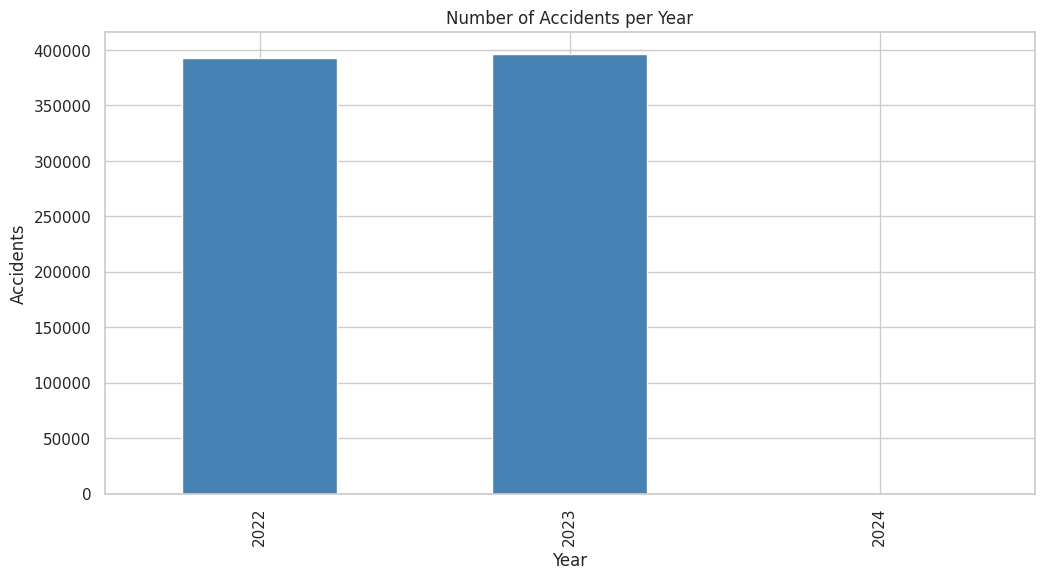

In [5]:
accidents_per_year = df['year'].value_counts().sort_index()
accidents_per_year.plot(kind='bar', color='steelblue')
plt.title("Number of Accidents per Year")
plt.ylabel("Accidents")
plt.xlabel("Year")
plt.show()

## Bivariate Analysis

Accident Type vs. Fatalities

<function matplotlib.pyplot.show(close=None, block=None)>

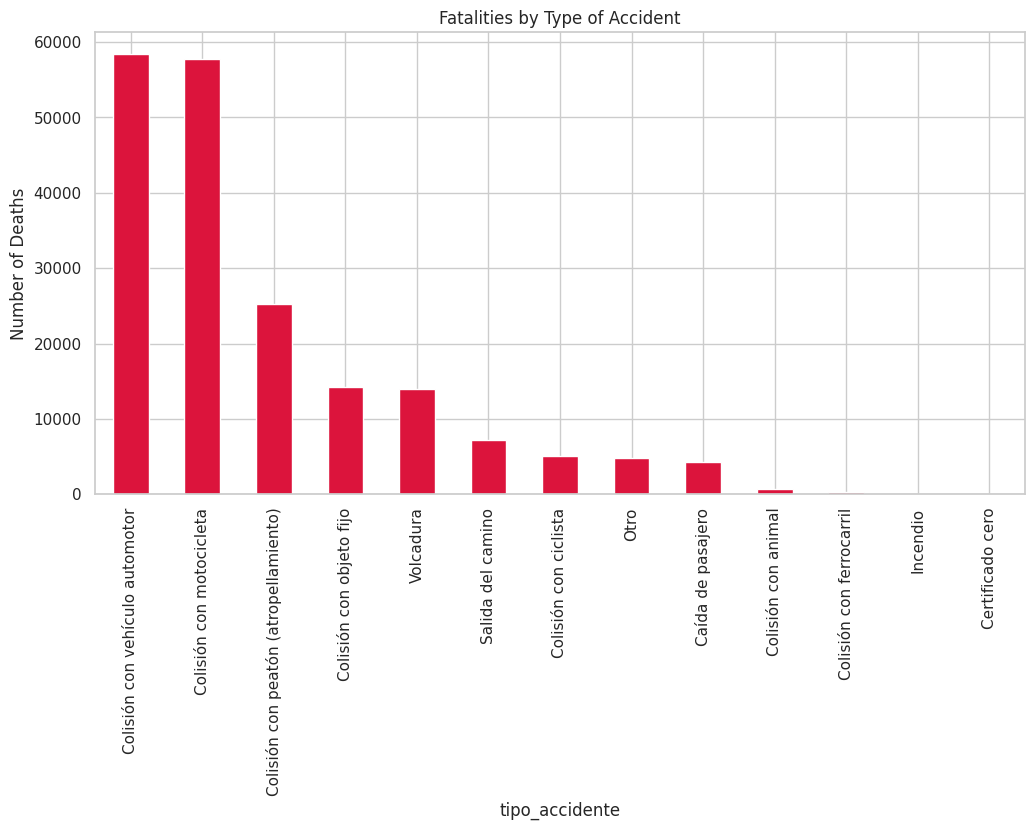

In [6]:
cols = ['ciclista_herido', 'conductor_herido', 'no_espec_herido', 'otro_herido', 'pasajero_herido', 'peaton_herido', 'ciclista_muerto', 'conductor_muerto', 'no_espec_muerto', 'otro_muerto', 'pasajero_muerto', 'peaton_muerto']
df['total_muertos'] = df[cols].sum(axis=1)

accident_deaths = df.groupby("tipo_accidente")["total_muertos"].sum().sort_values(ascending=False)
accident_deaths.plot(kind='bar', color='crimson')
plt.title("Fatalities by Type of Accident")
plt.ylabel("Number of Deaths")
plt.show

Zone vs. Total accidents

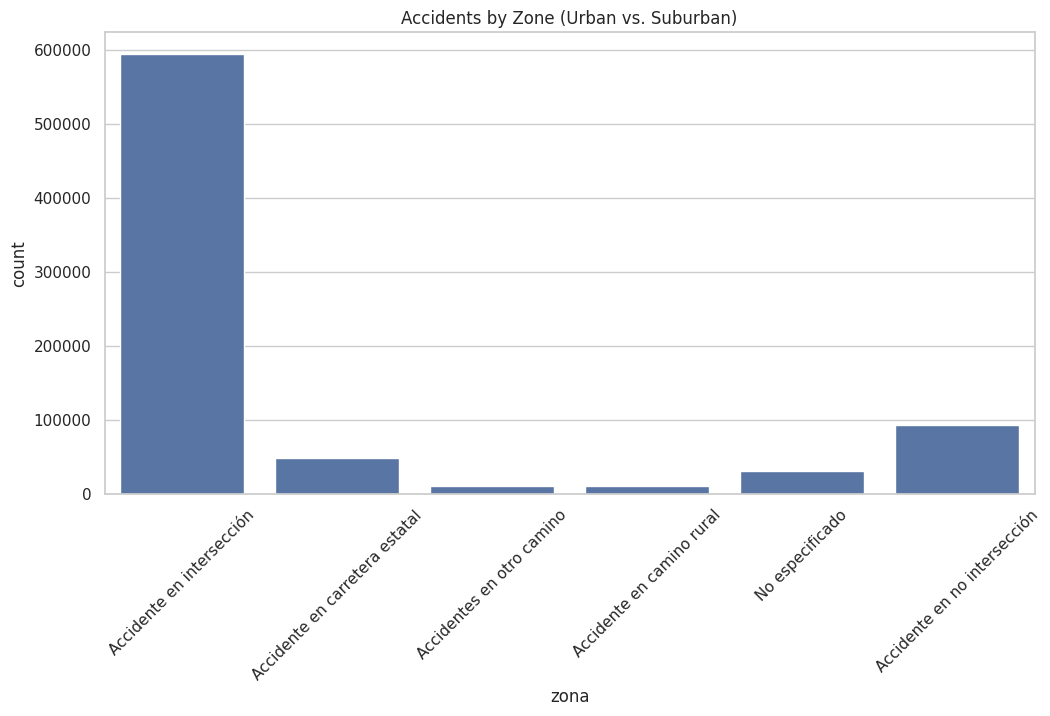

In [7]:
sns.countplot(data=df, x='zona')
plt.title("Accidents by Zone (Urban vs. Suburban)")
plt.xticks(rotation=45)
plt.show()

## Time Series Analysis

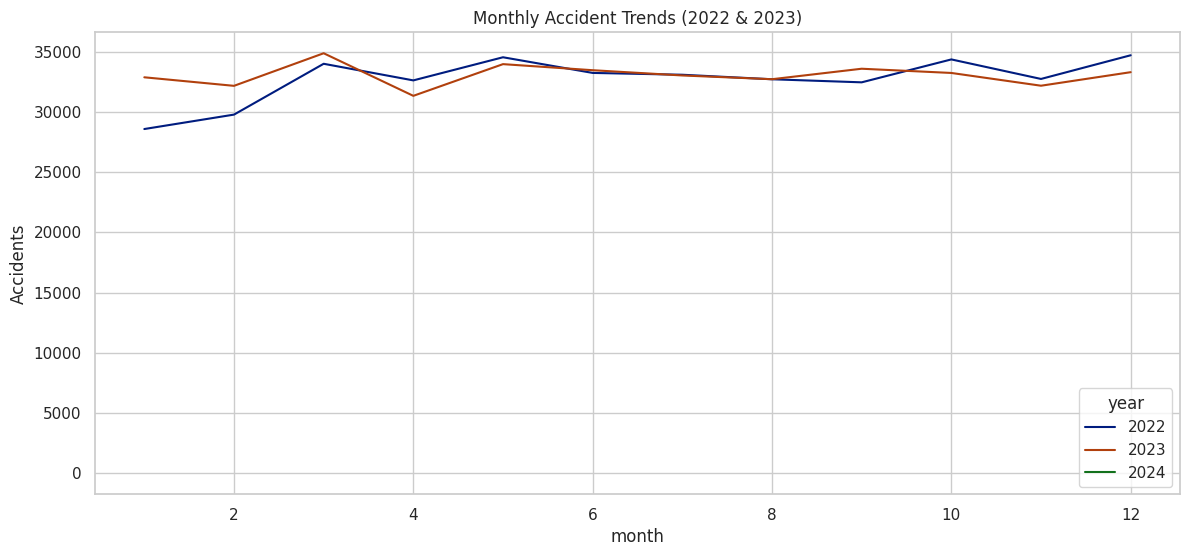

In [8]:
monthly_trend = df.groupby(['year', 'month']).size().reset_index(name='Accidents')

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trend, x='month', y='Accidents', hue='year', palette='dark')
plt.title("Monthly Accident Trends (2022 & 2023)")
plt.show()

## Geographic Analysis

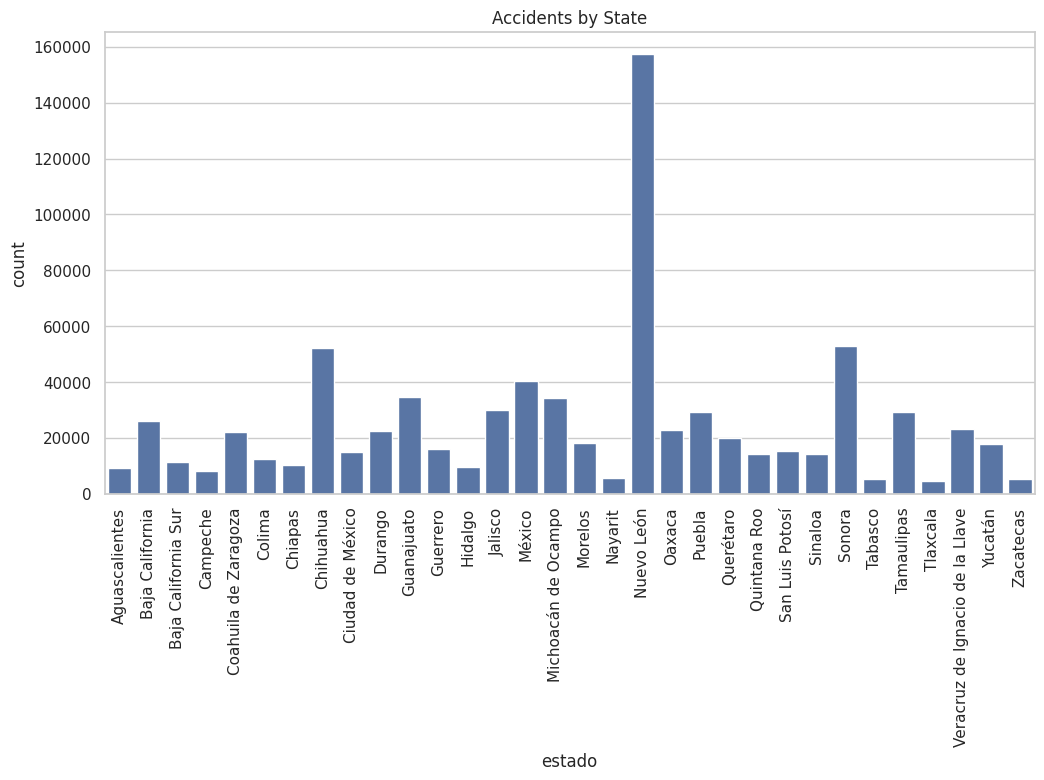

In [9]:
sns.countplot(data=df, x='estado')
plt.title("Accidents by State")
plt.xticks(rotation=90)
plt.show()

## Fatalities Analysis

Deaths per Year

In [14]:
deaths_per_years = df.groupby('year')['total_muertos'].sum().reset_index()
fig = px.line(deaths_per_years, x='year', y='total_muertos', markers=True, title='Total Deaths from Traffic Accidents Over Time')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Key Performance Indicators (KPIs)

In [11]:
total_accidents = len(df)
total_deaths = df['total_muertos'].sum()
fatality_rate = total_deaths / total_accidents * 100
avg_deaths = df['total_muertos'].mean()

print(f"🚨 Total accidents: {total_accidents}")
print(f"☠️ Total deaths: {total_deaths}")
print(f"📉 Fatal accident rate: {fatality_rate:.2f}%")
print(f"⚠️ Avg. deaths per accident: {avg_deaths:.2f}")

🚨 Total accidents: 789333
☠️ Total deaths: 191984
📉 Fatal accident rate: 24.32%
⚠️ Avg. deaths per accident: 0.24
